## Define history kernel using exponential basis

Text(0, 0.5, 'History kernel')

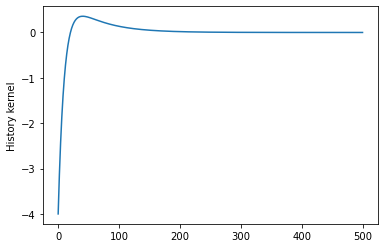

In [1]:
import matplotlib.pyplot as plt
import torch

from kernel.base import Kernel

%load_ext autoreload
%autoreload 2

# Define an exponential basis for the history kernel
dt = 1
support_range = torch.arange(0, 500, dt).unsqueeze(1)
tau = torch.tensor([10., 50]).unsqueeze(0)
basis = torch.exp(-support_range / tau)

# Define the basis weights
weight=torch.tensor([-5., 1])

# Define kernel
hist = Kernel(basis=basis, 
              weight=weight, 
              requires_grad=False)

# Plot
fig, ax = plt.subplots()
ax.plot(support_range, hist.evaluate(support_range))
ax.set_ylabel('History kernel')

## Define GLM with history filter and draw samples

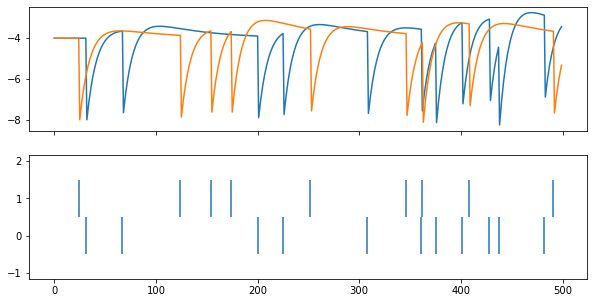

In [2]:
from mmdglm.glm.base import GLM

# Define GLM
glm = GLM(bias=-4, hist_kernel=hist)

t = torch.arange(0, 500, dt) # Time points
n = 2 # Number of samples

# Sample
log_lam, mask_spikes = glm.sample(t, shape=(n,))
t_spikes = [t[mask_spikes[:, i]] for i in range(n)]

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=2, sharex=True)
ax1.plot(t, log_lam.detach())
ax2.eventplot(t_spikes)

In [60]:
glm = GLM(bias=-3.5, stim_kernel=hist.clone(), hist_kernel=hist)

t = torch.arange(0, 500, dt) # Time points
n = 2 # Number of samples
stim = torch.randn(len(t), 2)

log_lam, mask_spikes = glm.sample(t, stim=stim, shape=(n,))
log_lam_cond = glm.log_conditional_intensity(t, mask_spikes, stim=stim)

assert torch.all(torch.isclose(log_lam, log_lam_cond, atol=1e-5))

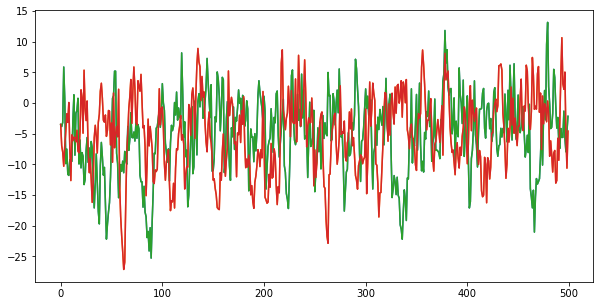

In [61]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, sharex=True)
ax.plot(log_lam[:, :, 0].detach())
ax.plot(log_lam_cond[:, :, 0].detach())

In [57]:
torch.sum(mask_spikes)

tensor(473)